In [1]:
import pandas as pd
import numpy as np
import pipes2 as pp

In [2]:
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('air_train.csv')
df = df.drop(['Unnamed: 0','id'], axis = 1)

df = pp.myPipe.transform(df)

X = df.drop(['satisfaction'], axis = 1)
y = df.satisfaction

In [9]:
df.shape

(103904, 23)

In [4]:
mean = df.mean()

In [5]:
df = df - mean

In [24]:
pc = PCA(n_components = 20)
d2 = pc.fit_transform(X)

In [25]:
d2.shape

(103904, 20)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
tree = DecisionTreeClassifier()
tree.fit(d2,y) 

DecisionTreeClassifier()

In [28]:
tree.score(d2,y)

1.0

In [29]:
t = pd.read_csv('air_test.csv')
t = t.drop(['Unnamed: 0','id'], axis = 1)
t = pp.myPipe.transform(t)

X_t = t.drop(['satisfaction'], axis = 1)
y_t = t.satisfaction

d2_t = pc.transform(X_t)

In [30]:
tree.score(d2_t,y_t)

0.8800431167231291

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)



/home/sergey/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sergey/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


NameError: name 'plt' is not defined

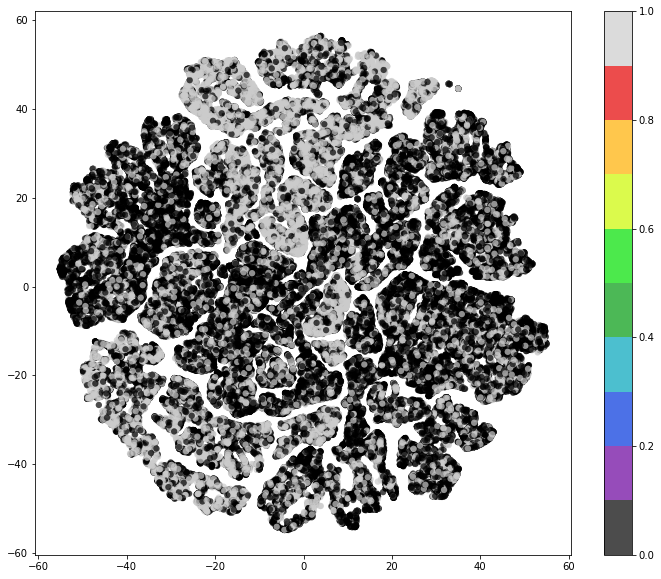

In [43]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

In [44]:
tree = DecisionTreeClassifier()
tree.fit(X_tsne,y) 

DecisionTreeClassifier()

In [46]:
tree.score(X_tsne,y)

1.0